In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1>Data Identification</h1>

In [2]:
#Loading Data
df =pd.read_csv('earthquakes.csv')

In [3]:
df.describe()

,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM,postcode,timezone
count,1137.000000,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,197.000000,1137.000000
mean,4.856675,1.712005e+12,1.716957e+12,414.408091,2.925242,4.320141,0.059807,432.698329,115.094107,1.342604,0.585974,55.055286,41.287300,27.308909,-3.930635,52.289358,83086.131980,21.741425
std,1.047840,1.151499e+10,1.108033e+10,5746.971362,2.562707,1.453949,0.237232,256.177844,91.877870,1.704364,0.308556,37.609237,87.866489,20.133139,118.043697,56.027469,12812.555204,440.864430
min,3.000000,1.690000e+12,1.690000e+12,0.000000,0.000000,1.000000,0.000000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,-43.706400,-179.807000,0.000000,8833.000000,-720.000000
25%,3.800000,1.700000e+12,1.710000e+12,0.000000,0.000000,4.000000,0.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000,79331.000000,-360.000000
50%,5.300000,1.710000e+12,1.720000e+12,2.000000,3.000000,4.000000,0.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000,79772.000000,-180.000000
75%,5.600000,1.720000e+12,1.730000e+12,24.000000,5.000000,5.000000,0.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000,92530.000000,480.000000
max,7.600000,1.730000e+12,1.730000e+12,183786.000000,9.000000,9.000000,1.000000,2419.000000,619.000000,12.457000,2.520000,256.000000,639.503000,68.176100,179.972000,298.000000,99827.000000,780.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   float64
 6   updated          1137 non-null   float64
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

<h1>Data preprocessing</h1> 


<h2>Choosing columns</h2>

In [5]:
#droping unused columns 
# we will use 'longitude' and 'latitude' instead of the next columns

df = df.drop(columns=['locality','placeOnly','location','place','timezone','locationDetails'])

#constant columns 
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)

#Droping description columns 
df=df.drop(columns=['id','ids','title','date','time','updated', 'url','code','detailUrl','sources', 'types','what3words','status','tsunami'])

<h2>Handling missing values<h2>

In [6]:
#columns with messing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0] 
missing_columns

alert          373
continent      270
country        338
subnational    421
city           463
postcode       940
dtype: int64

<h3> Predict Missing Alerts Using Machine Learning</h3>

In [7]:
# Predict Missing Alerts Using Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Columns to use
columns = ['alert', 'longitude', 'latitude', 'depth', 'sig', 'nst', 'rms', 'dmin', 'mmi', 'cdi']
df_alert = df[columns]

# Separate rows with and without missing 'alert'
df_known = df_alert.dropna(subset=['alert'])
df_missing = df_alert[df_alert['alert'].isnull()]

# Features and target
X = df_known.drop(columns=['alert'])
y = df_known['alert']

# Train a classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict missing 'alert' values
missing_alerts = model.predict(df_missing.drop(columns=['alert']))

# Update the 'alert' column in the original DataFrame
df.loc[df['alert'].isnull(), 'alert'] = missing_alerts

# The df DataFrame now contains the predicted values for the missing 'alert' column
# Evaluate the model accuracy
y_pred = model.predict(X_test)  # Predictions on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 98.04%


In [8]:
#droping inused columns with messing values 
# we will use 'longitude' and 'latitude' instead 
columns_to_drop = ['continent','country', 'subnational', 'city', 'postcode']
df = df.drop(columns=columns_to_drop)


<h2>Outliers</h2>

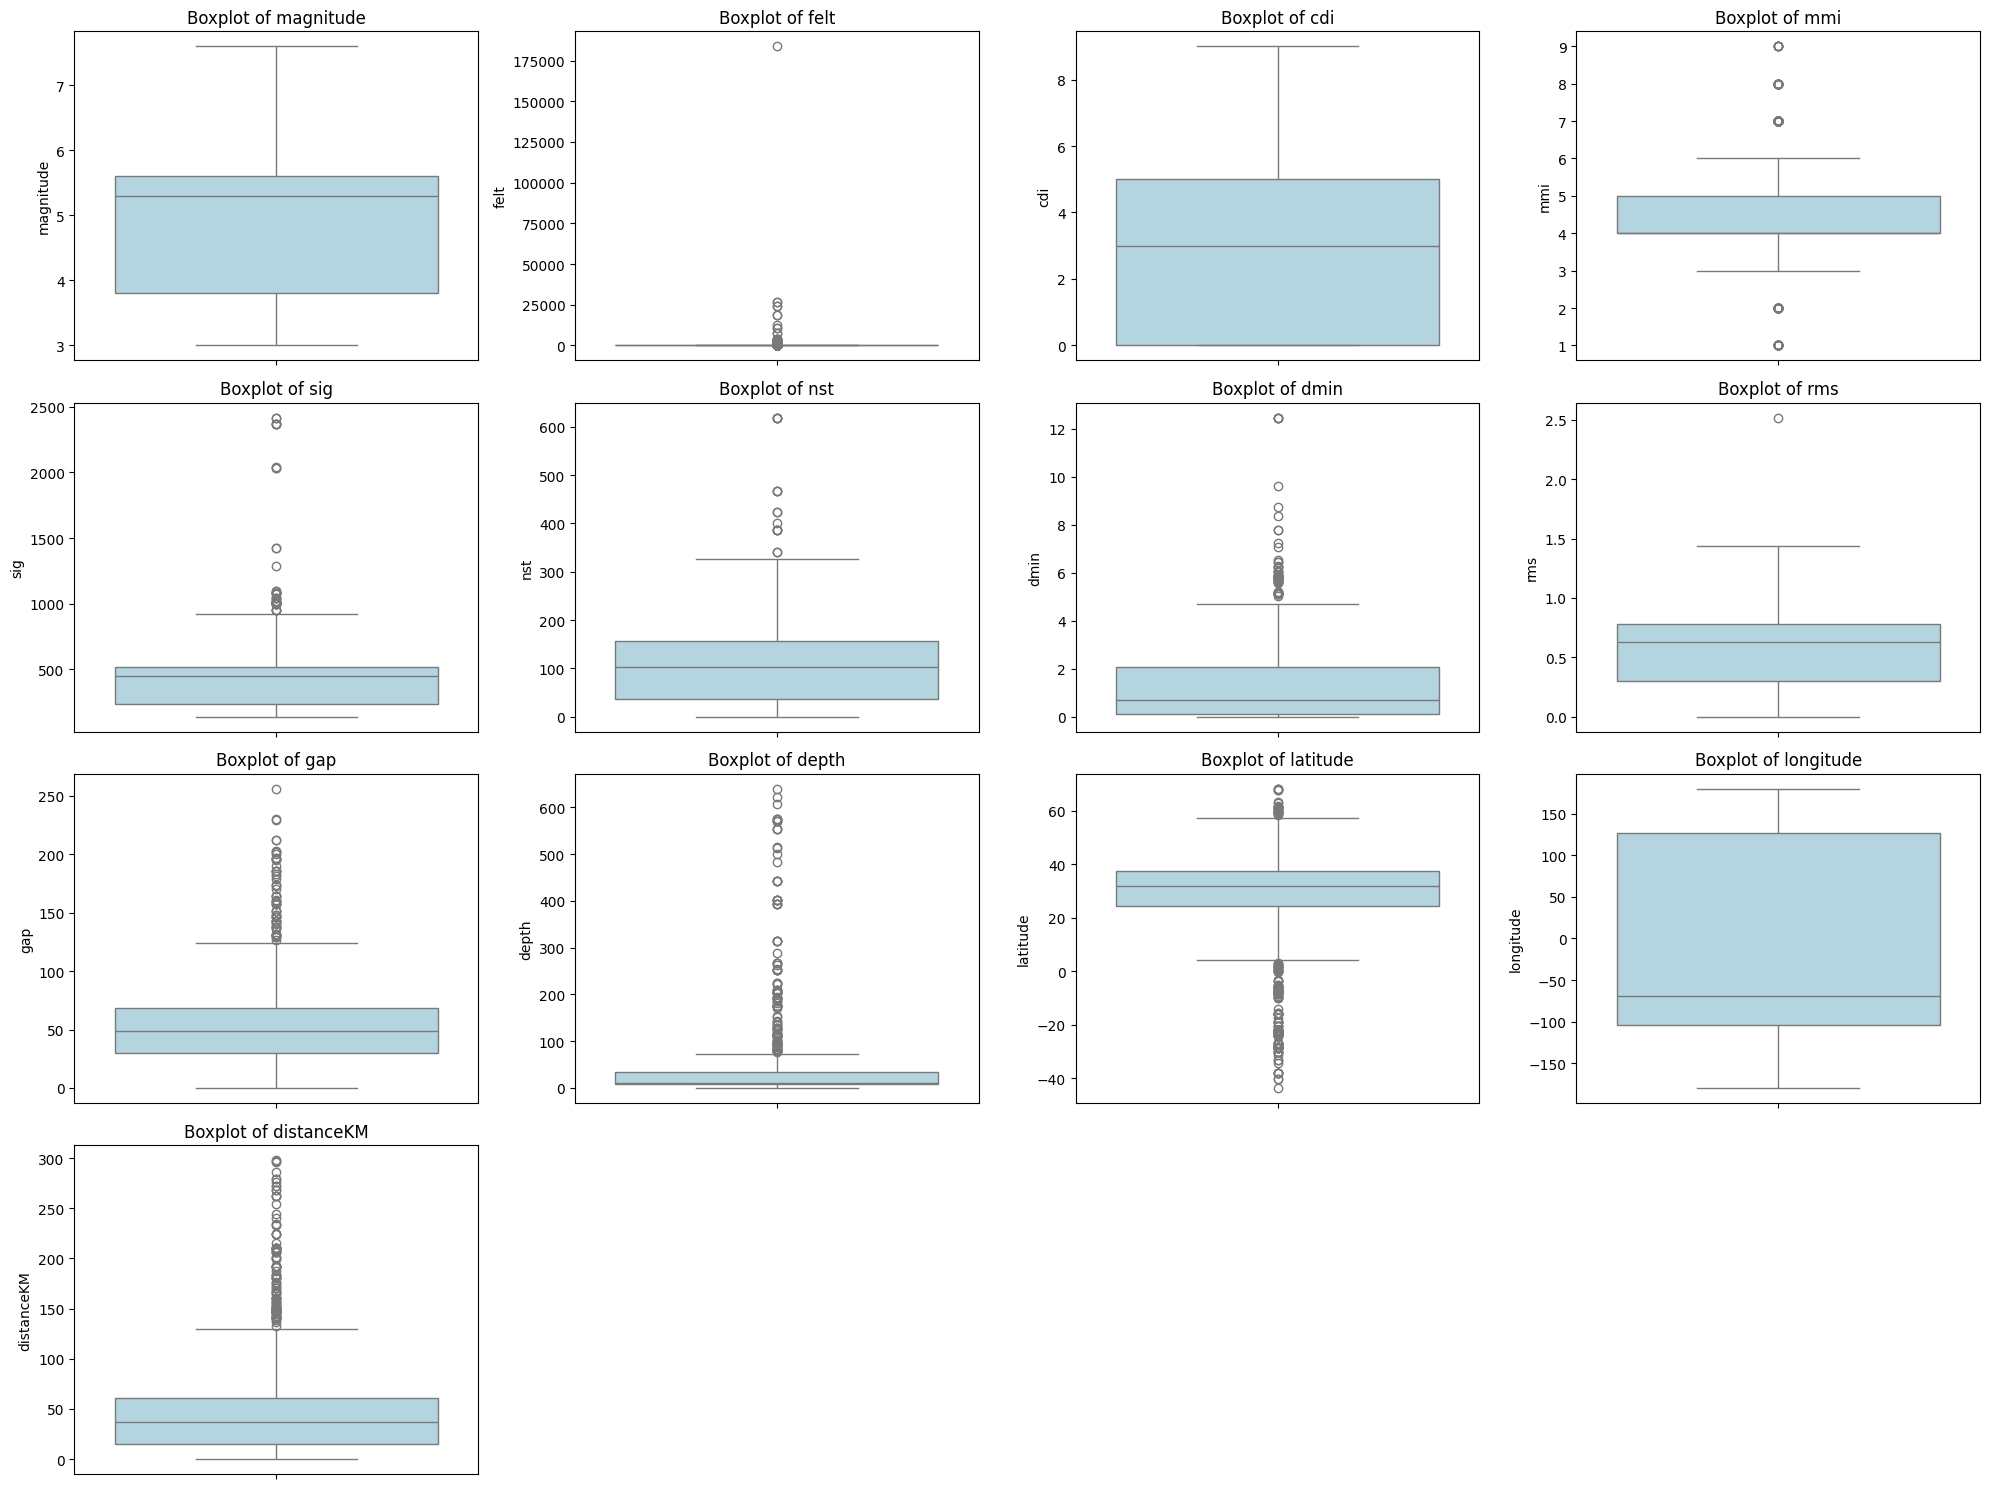

In [9]:

# Define numerical columns to plot
numeric_cols = ['magnitude', 'felt', 'cdi', 'mmi', 'sig', 'nst', 'dmin','rms', 'gap', 'depth', 'latitude', 'longitude','distanceKM']

# Set up the figure size
plt.figure(figsize=(20, 15))

# Create subplots for each column
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)  # 4x4 grid of subplots
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.show()


In [10]:

# Loop through each column to detect outliers

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile range
    
    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter and display rows with outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")


Column 'magnitude' has 0 outliers.
Column 'felt' has 188 outliers.
Column 'cdi' has 0 outliers.
Column 'mmi' has 186 outliers.
Column 'sig' has 40 outliers.
Column 'nst' has 16 outliers.
Column 'dmin' has 59 outliers.
Column 'rms' has 1 outliers.
Column 'gap' has 65 outliers.
Column 'depth' has 130 outliers.
Column 'latitude' has 165 outliers.
Column 'longitude' has 0 outliers.
Column 'distanceKM' has 112 outliers.


In [11]:
#Removing Outliers

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # Premier quartile
    Q3 = df[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1                 # Écart interquartile
    lower_bound = Q1 - 1.5 * IQR  # Limite inférieure
    upper_bound = Q3 + 1.5 * IQR  # Limite supérieure
    # Filtrer les outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [12]:
# Vérificaiton

# Loop through each column to detect outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile range
    
    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter and display rows with outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}' has {len(outliers)} outliers.")


Column 'magnitude' has 0 outliers.
Column 'felt' has 0 outliers.
Column 'cdi' has 0 outliers.
Column 'mmi' has 0 outliers.
Column 'sig' has 0 outliers.
Column 'nst' has 0 outliers.
Column 'dmin' has 0 outliers.
Column 'rms' has 0 outliers.
Column 'gap' has 0 outliers.
Column 'depth' has 0 outliers.
Column 'latitude' has 0 outliers.
Column 'longitude' has 0 outliers.
Column 'distanceKM' has 0 outliers.


<h1>Exploratory Data Analysis (EDA)</h1>

In [13]:
# Analyse descriptive
df.describe()

,magnitude,felt,cdi,mmi,sig,nst,dmin,rms,gap,depth,latitude,longitude,distanceKM
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,4.856675,15.542656,2.925242,4.291117,419.161829,113.376429,1.267328,0.585077,52.735585,23.368253,29.859733,-3.930635,46.480211
std,1.047840,22.622596,2.562707,1.172657,191.696430,85.595187,1.435717,0.304383,30.685343,23.703139,13.963580,118.043697,40.866988
min,3.000000,0.000000,0.000000,2.500000,138.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,4.242100,-179.807000,0.000000
25%,3.800000,0.000000,0.000000,4.000000,234.000000,37.000000,0.100000,0.300000,30.000000,7.550000,24.195400,-104.452000,15.000000
50%,5.300000,2.000000,3.000000,4.000000,449.000000,102.000000,0.680000,0.630000,49.000000,10.000000,31.667700,-68.682000,37.000000
75%,5.600000,24.000000,5.000000,5.000000,518.000000,157.000000,2.061000,0.780000,68.000000,34.723000,37.497600,126.628000,61.000000
max,7.600000,60.000000,9.000000,6.500000,944.000000,337.000000,5.002500,1.500000,125.000000,75.482500,57.450900,179.972000,130.000000


<h2>Encoding</h2>

In [14]:
#alert (ordinale encoding)
from sklearn.preprocessing import OrdinalEncoder

# Define the order of the categories
categories = [['green', 'yellow', 'orange', 'red']]

# Initialize the OrdinalEncoder with the categories
encoder = OrdinalEncoder(categories=categories)

# Reshape the 'alert' column and fit the encoder
df['alert'] = encoder.fit_transform(df[['alert']])

# Display the updated 
df['alert']


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1132    2.0
1133    1.0
1134    2.0
1135    0.0
1136    0.0
Name: alert, Length: 1137, dtype: float64

In [15]:
#magtype

# Order of categories
# Standardize to lowercase
df['magType'] = df['magType'].str.lower()

# Updated categories list
categories = [['mww', 'ml', 'mb', 'mw', 'mwr', 'mb_lg', 'mwb', 'mi']]

# Initialize and apply OrdinalEncoder
encoder = OrdinalEncoder(categories=categories)
df['magType'] = encoder.fit_transform(df[['magType']])


# Display the updated 
df['magType']



0       0.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
1132    0.0
1133    2.0
1134    0.0
1135    0.0
1136    0.0
Name: magType, Length: 1137, dtype: float64

In [16]:
#net

# Define the order of categories (alphabetical order used here)
categories = [['ak', 'at', 'ci', 'nc', 'nn', 'nm', 'ok', 'tx', 'us', 'uu', 'uw']]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=categories)

# Apply encoding to the 'net' column
df['net'] = encoder.fit_transform(df[['net']])

df['net']

0       8.0
1       7.0
2       2.0
3       7.0
4       8.0
       ... 
1132    8.0
1133    8.0
1134    8.0
1135    8.0
1136    8.0
Name: net, Length: 1137, dtype: float64

In [17]:
# Calcul de la matrice de corrélation pour les colonnes numériques
correlation_matrix = df[['magnitude'] + columns].corr()

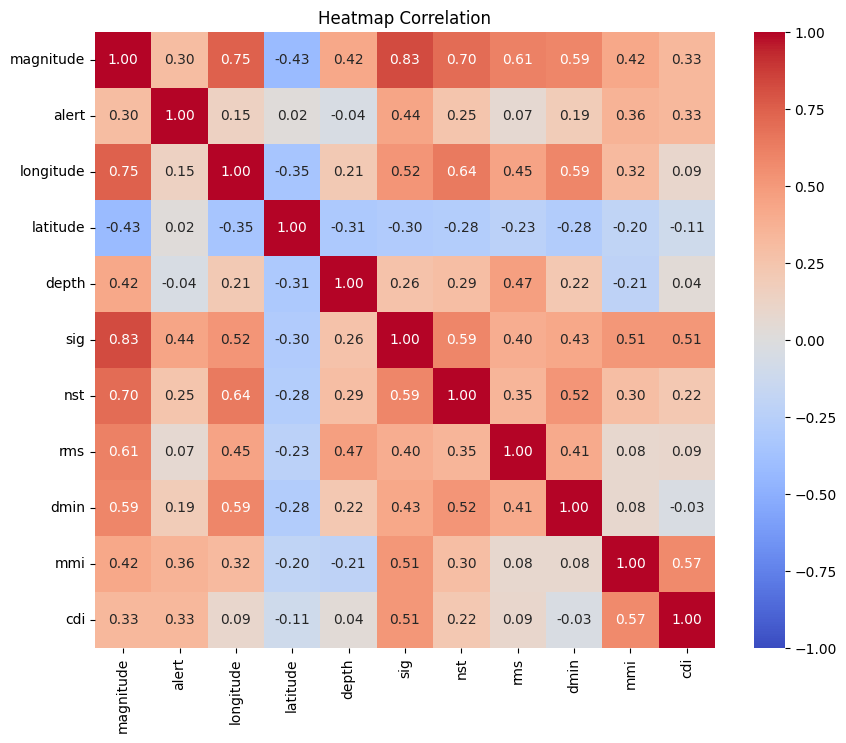

In [18]:
# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap Correlation')
plt.show()

<h1>Model Training:</h1>

In [19]:
# 5. Division des données en ensembles d'entraînement et de test
X = df.drop('magnitude', axis=1)
y = df['magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 6. Construction et entraînement des modèles
from sklearn.ensemble import GradientBoostingRegressor

# Initializing the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Initializing the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fitting the model to the training data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [21]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
gb_y_pred = gb_model.predict(X_test)

# Calcul des métriques finales
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)

print("Random Forest  - MAE:", rf_mae, "MSE:", rf_mse)
print("Gradient Boosting - MAE:",gb_mae, "MSE:", gb_mse)


Random Forest  - MAE: 0.028050877192984644 MSE: 0.004458192280701777
Gradient Boosting - MAE: 0.051924132102625926 MSE: 0.007401914631568397


In [22]:
from sklearn.metrics import r2_score

# Calculate R² for Random Forest
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"R-squared for Random Forest: {rf_r2:.4f}")

# Calculate R² for Gradient Boosting
gb_r2 = r2_score(y_test, gb_y_pred)
print(f"R-squared for Gradient Boosting: {gb_r2:.4f}")


R-squared for Random Forest: 0.9959
R-squared for Gradient Boosting: 0.9931


In [23]:
# 9. Optimisation des hyperparamètres avec validation croisée
from sklearn.model_selection import GridSearchCV
# Hyperparamètres pour Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],       # Nombre d'arbres
    'max_depth': [10, 15, 20],            # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],      # Minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]         # Minimum d'échantillons dans une feuille
}

In [24]:
# Modèle Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',    # Critère d'évaluation
    cv=5,                               # Validation croisée à 5 plis
    n_jobs=-1,                          # Utilisation de tous les cœurs disponibles
    verbose=2                           # Affichage des étapes
)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END max_depth=10, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
# Meilleurs hyperparamètres pour Random Forest
print("Meilleurs hyperparamètres pour Random Forest:", rf_grid_search.best_params_)


Meilleurs hyperparamètres pour Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:

# Hyperparamètres pour Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150, 200],      # Nombre d'arbres
    'learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
    'max_depth': [3, 4, 5],              # Profondeur maximale des arbres
    'subsample': [0.8, 0.9, 1.0]         # Fraction d'échantillons utilisée pour chaque arbre
}

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Modèle Gradient Boosting
gb_grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    scoring='neg_mean_squared_error',    # Critère d'évaluation
    cv=5,                               # Validation croisée à 5 plis
    n_jobs=-1,                          # Utilisation de tous les cœurs disponibles
    verbose=2                           # Affichage des étapes
)
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Meilleurs hyperparamètres pour Gradient Boosting
print("Meilleurs hyperparamètres pour Gradient Boosting:", gb_grid_search.best_params_)


Meilleurs hyperparamètres pour Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [29]:
# 10. Évaluation finale des modèles avec les meilleurs hyperparamètres
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_


In [30]:
# Prédictions finales
best_rf_preds = best_rf_model.predict(X_test)
best_gb_preds = best_gb_model.predict(X_test)


In [31]:
# Calcul des métriques finales
best_rf_mae = mean_absolute_error(y_test, best_rf_preds)
best_rf_mse = mean_squared_error(y_test, best_rf_preds)

best_gb_mae = mean_absolute_error(y_test, best_gb_preds)
best_gb_mse = mean_squared_error(y_test, best_gb_preds)

print("Random Forest après optimisation - MAE:", best_rf_mae, "MSE:", best_rf_mse)
print("Gradient Boosting après optimisation - MAE:", best_gb_mae, "MSE:", best_gb_mse)


Random Forest après optimisation - MAE: 0.028050877192984644 MSE: 0.004458192280701777
Gradient Boosting après optimisation - MAE: 0.026507854790826253 MSE: 0.0034243183263576583


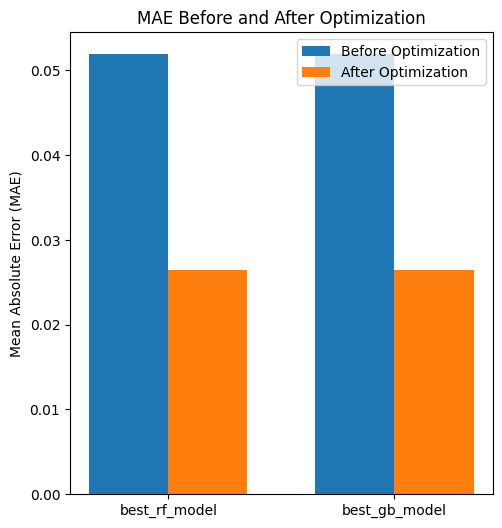

In [32]:
# Plotting MAE comparison for Gradient Boosting
models = ['best_rf_model', 'best_gb_model']
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(models))

plt.bar(index, gb_mae, bar_width, label='Before Optimization')
plt.bar([i + bar_width for i in index], best_gb_mae, bar_width, label='After Optimization')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Before and After Optimization')
plt.legend()

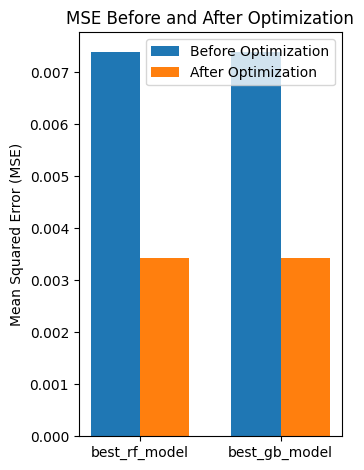

In [33]:
# Plotting MSE comparison
plt.subplot(1, 2, 2)
plt.bar(index, gb_mse, bar_width, label='Before Optimization')
plt.bar([i + bar_width for i in index], best_gb_mse, bar_width, label='After Optimization')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Optimization')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
# Sélection du meilleur modèle
if best_rf_mae < best_gb_mae:
    print("Le modèle Random Forest optimisé est le meilleur avec des hyperparamètres :", rf_grid_search.best_params_)
else:
    print("Le modèle Gradient Boosting optimisé est le meilleur avec des hyperparamètres :", gb_grid_search.best_params_)


Le modèle Gradient Boosting optimisé est le meilleur avec des hyperparamètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


/tmp/ipykernel_32583/1925215359.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')


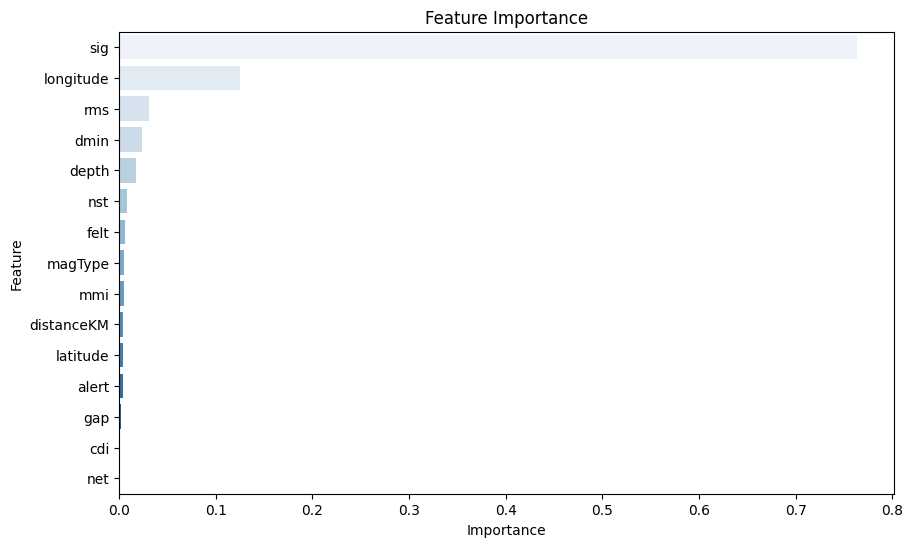

In [35]:
# Feature Importance for Random Forest
feature_importances = best_rf_model.feature_importances_
# If X_train is processed, X_train.columns should match the length of importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use the transformed feature names
    'Importance': feature_importances
})

# Continue with sorting and plotting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')
plt.title('Feature Importance')
plt.show()


/tmp/ipykernel_32583/2620355578.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')


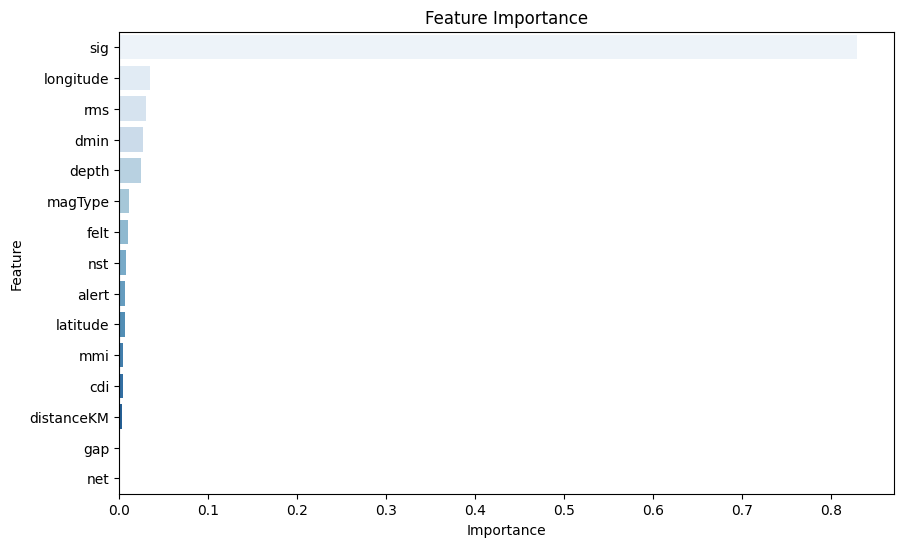

In [36]:
# Feature Importance For Gradient Boosting

feature_importances = best_gb_model.feature_importances_
# If X_train is processed, X_train.columns should match the length of importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use the transformed feature names
    'Importance': feature_importances
})

# Continue with sorting and plotting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')
plt.title('Feature Importance')
plt.show()


In [37]:

# Calculate R² for Random Forest
rf_r2 = r2_score(y_test, best_rf_preds)
print(f"R-squared for Random Forest: {rf_r2:.4f}")

# Calculate R² for Gradient Boosting
gb_r2 = r2_score(y_test, best_gb_preds)
print(f"R-squared for Gradient Boosting: {gb_r2:.4f}")


R-squared for Random Forest: 0.9959
R-squared for Gradient Boosting: 0.9968


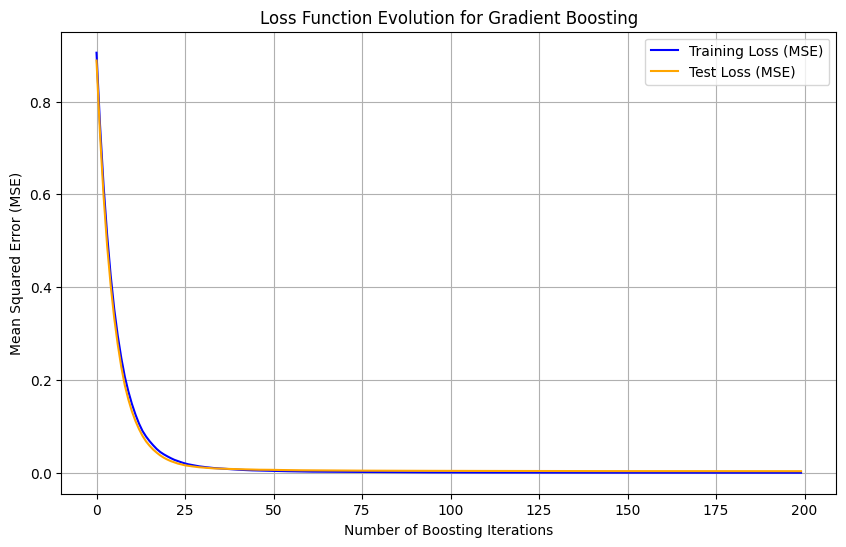

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Initialize arrays to store training and test loss
train_loss = []
test_loss = []

# Staged predictions for Gradient Boosting
for train_pred, test_pred in zip(best_gb_model.staged_predict(X_train), best_gb_model.staged_predict(X_test)):
    train_loss.append(mean_squared_error(y_train, train_pred))  # Training Loss
    test_loss.append(mean_squared_error(y_test, test_pred))     # Test Loss

# Plot Loss Function Evolution
plt.figure(figsize=(10, 6))

plt.plot(train_loss, label='Training Loss (MSE)', color='blue')
plt.plot(test_loss, label='Test Loss (MSE)', color='orange')
plt.xlabel('Number of Boosting Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss Function Evolution for Gradient Boosting')
plt.legend()
plt.grid(True)

plt.show()


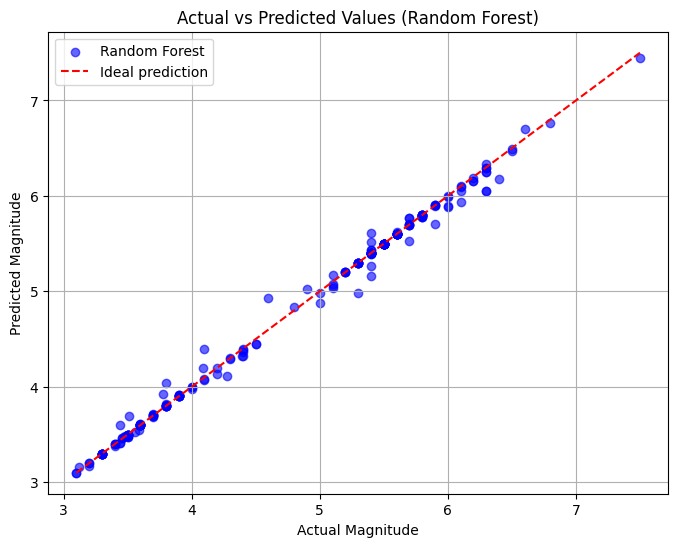

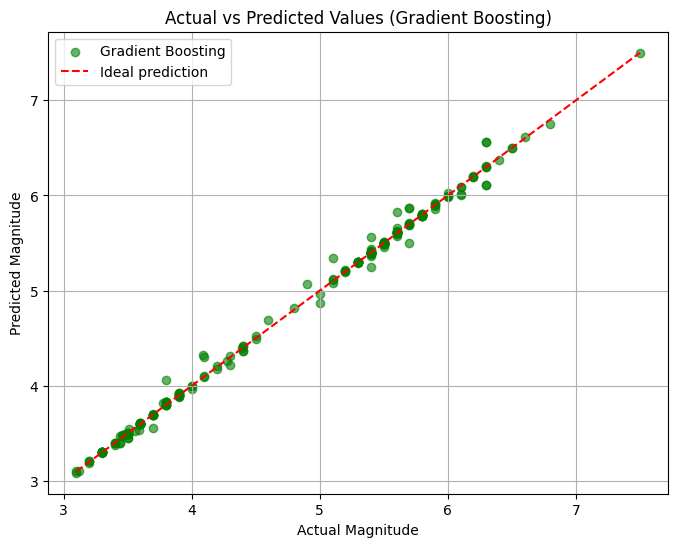

In [39]:

# Scatter plot for Random Forest model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_rf_preds, color='blue', label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction')

plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_gb_preds, color='green', label='Gradient Boosting', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal prediction')

plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.legend()
plt.grid(True)
plt.show()